# Value at Risk - Monte Carlo Method

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

## set time for number of years

In [2]:
years = 15

endDate = dt.datetime.now()
startDate= endDate - dt.timedelta(days= 365*years)

### tickers

In [3]:
tickers=['SPY', 'BND', 'GLD','QQQ', 'VTI']

### Download daily adjusted close prices

In [4]:
adj_close_df= pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start= startDate, end = endDate)
    adj_close_df[ticker]= data['Adj Close']
    
    print(adj_close_df)

[*********************100%***********************]  1 of 1 completed
                   SPY
Date                  
2009-07-23   73.858017
2009-07-24   74.160553
2009-07-27   74.379868
2009-07-28   74.031952
2009-07-29   73.850456
...                ...
2024-07-15  561.530029
2024-07-16  564.859985
2024-07-17  556.940002
2024-07-18  552.659973
2024-07-19  548.900024

[3773 rows x 1 columns]
[*********************100%***********************]  1 of 1 completed
                   SPY        BND
Date                             
2009-07-23   73.858017  50.613537
2009-07-24   74.160553  50.633068
2009-07-27   74.379868  50.567993
2009-07-28   74.031952  50.620056
2009-07-29   73.850456  50.600525
...                ...        ...
2024-07-15  561.530029  72.750000
2024-07-16  564.859985  73.029999
2024-07-17  556.940002  73.099998
2024-07-18  552.659973  72.910004
2024-07-19  548.900024  72.720001

[3773 rows x 2 columns]
[*********************100%***********************]  1 of 1 completed
  

### Claculate daily log returns and drop NAs

In [5]:
log_returns= np.log(adj_close_df/adj_close_df.shift(1))
log_returns = log_returns.dropna()

print (log_returns)

                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2009-07-24  0.004088  0.000386  0.001607 -0.007653  0.003245
2009-07-27  0.002953 -0.001286  0.003206  0.007653  0.004243
2009-07-28 -0.004689  0.001029 -0.017221 -0.006884 -0.002423
2009-07-29 -0.002455 -0.000386 -0.009929  0.006630 -0.004862
2009-07-30  0.010391  0.004491  0.004595  0.005830  0.010706
...              ...       ...       ...       ...       ...
2024-07-15  0.002746 -0.003157  0.003222  0.002684  0.004272
2024-07-16  0.005913  0.003841  0.019730  0.000383  0.008203
2024-07-17 -0.014120  0.000958 -0.004654 -0.029794 -0.014217
2024-07-18 -0.007715 -0.002602 -0.006402 -0.004744 -0.008760
2024-07-19 -0.006827 -0.002609 -0.018101 -0.008903 -0.006252

[3772 rows x 5 columns]


### Create a function to calculate portfolio expected return

In [23]:
def expected_return(weight, log_returns):
    return np.sum(log_returns.mean()*weights)

### Function to calculate portfolio standard deviation

In [24]:
def standard_deviation (weights, cov_matrix):
    variance = weights.T@cov_matrix@weights
    return np.sqrt(variance)

### Create a covariance matrix

In [25]:
cov_matrix = log_returns.cov()
print(cov_matrix)

              SPY           BND       GLD           QQQ           VTI
SPY  1.164759e-04 -8.105420e-08  0.000006  1.284640e-04  1.189313e-04
BND -8.105420e-08  9.188540e-06  0.000009  7.641369e-07  1.035353e-07
GLD  6.477642e-06  8.777065e-06  0.000097  7.327408e-06  7.091906e-06
QQQ  1.284640e-04  7.641369e-07  0.000007  1.645877e-04  1.312520e-04
VTI  1.189313e-04  1.035353e-07  0.000007  1.312520e-04  1.224257e-04


### create an equally weighted portfolio

In [26]:
portfolio_value= 1000000
weights = np.array([1/len(tickers)]*len(tickers))
portfolio_expected_return = expected_return(weights, log_returns)
portfolio_std_dev = standard_deviation (weights, cov_matrix)

### Create a function that gives a random z-score based on normal distribution

In [27]:
def random_z_score():
    return np.random.normal(0,1)

### Create a functio to calculate scenarion gainloss

In [30]:
days =5 
def scenario_gain_loss(portfolio_value,portfolio_std_dev, z_score, days):
    return portfolio_value * portfolio_expected_return* days + portfolio_value*portfolio_std_dev*z_score* np.sqrt(days)

### Run 10000 simulations

In [31]:
simulations = 10000
scenarioreturn = []

for i in range(simulations):
    z_score = random_z_score()
    scenarioreturn.append(scenario_gain_loss(portfolio_value,portfolio_std_dev, z_score, days))

### Specify confidence intervals

In [35]:
confidence_interval = 0.95
VaR = -np.percentile(scenarioreturn,100*(1-confidence_interval))
print(VaR)

25057.05619523313


### Plot the results of 10000 scenarios

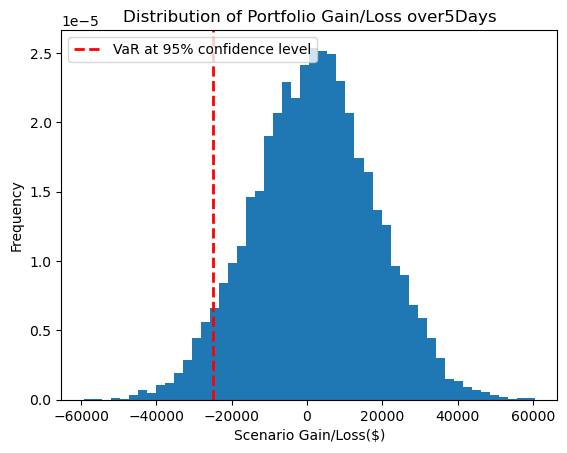

In [37]:
plt.hist(scenarioreturn, bins=50, density=True)
plt.xlabel('Scenario Gain/Loss($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio Gain/Loss over{days}Days')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()